<a href="https://colab.research.google.com/github/manje22/FraudDetection/blob/main/UPZ_PDP_SEMINAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraud detection using machine learning

dataset: https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset/data

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
%cd /content/drive/MyDrive/UPZ-PDP_seminar/

/content/drive/MyDrive/UPZ-PDP_seminar


In [4]:
%ls

'AIML Dataset.csv'


#Data analysis

In [5]:
df = pd.read_csv('AIML Dataset.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


Moze se zakljucit da su podaci NEbalansirani (broj clanova klase 0 je mnogo brojniji od broj clanova klase 1)

In [10]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Nema nedostajućih vrijednosti

In [12]:
df.shape

(6362620, 11)

In [13]:
(df["isFraud"].value_counts()[1]/ df.shape[0]) * 100

np.float64(0.12908204481801522)

Postotak redova koji su zapravo fraud, da nastavimo ovako klase bi bile ne balansirane

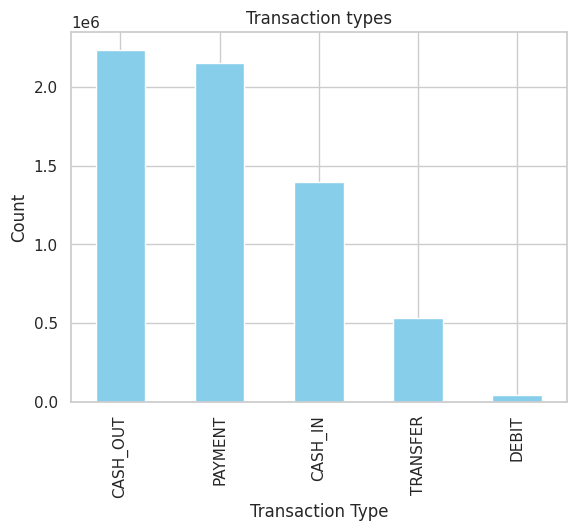

In [14]:
df["type"].value_counts().plot(kind="bar", title="Transaction types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [16]:
fraud_by_type = df[df["isFraud"] == 1]["type"].value_counts()
fraud_by_type

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [18]:
df["amount"].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


Text(0, 0.5, 'Count')

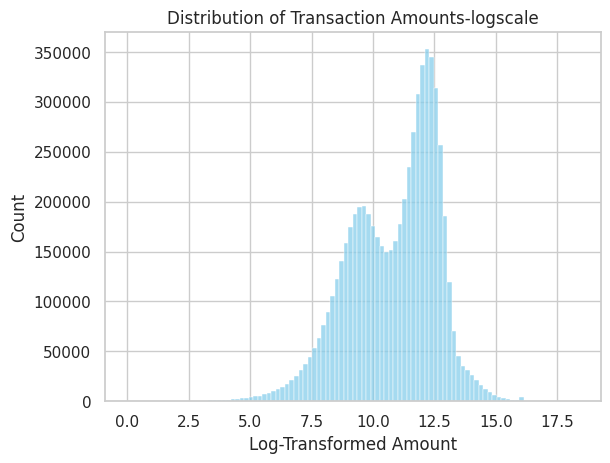

In [20]:
sns.histplot(np.log1p(df["amount"]), bins=100, color="skyblue")
plt.title("Distribution of Transaction Amounts-logscale")
plt.xlabel("Log-Transformed Amount")
plt.ylabel("Count")

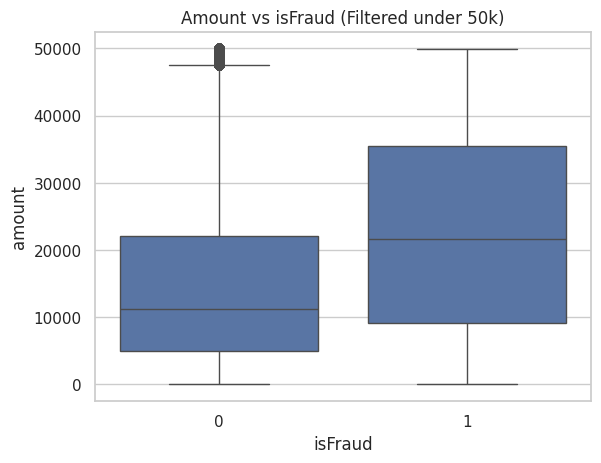

In [21]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [22]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [24]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [26]:
(df["balanceDiffDest"] < 0).sum()

np.int64(2806464)

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


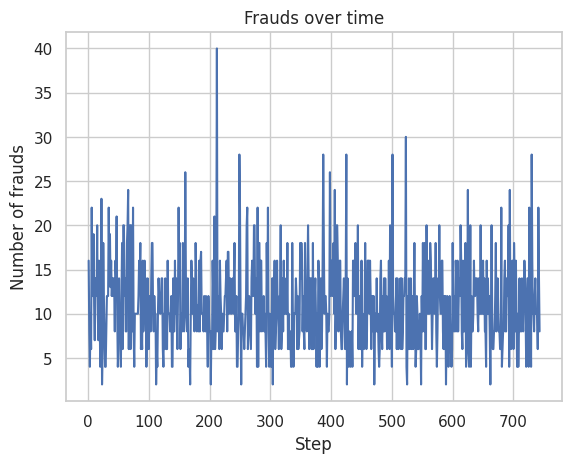

In [28]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="frauds per step")
plt.xlabel("Step")
plt.ylabel("Number of frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

Iz ovog prikaza može se zaključiti da broj prijevara nije ovisan o vremenu, stoga možemo izbaciti stupac Step

In [29]:
df.drop(columns="step", inplace=True)

In [30]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


Pronalaženje korisnika koji najviše šalju, primaju

In [31]:
top_senders = df["nameOrig"].value_counts().head(10)

In [32]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [33]:
top_recivers = df["nameDest"].value_counts().head(10)

In [34]:
top_recivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


Korisnici koji su bili zaslužini za prijevare

In [35]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head()

In [36]:
fraud_users

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1


In [38]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [39]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


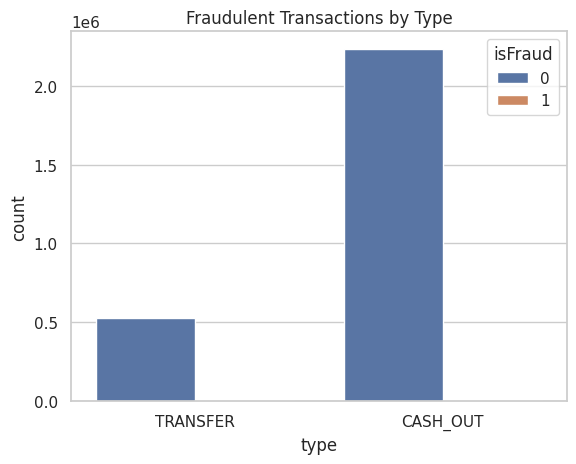

In [40]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraudulent Transactions by Type")
plt.show()

In [44]:
df.rename(columns={"oldbalanceOrg": "oldbalanceOrig"}, inplace=True) ##preimenovanje stupca za lakši rad

In [46]:
corr = df[["amount", "oldbalanceOrig", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [47]:
corr

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrig,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


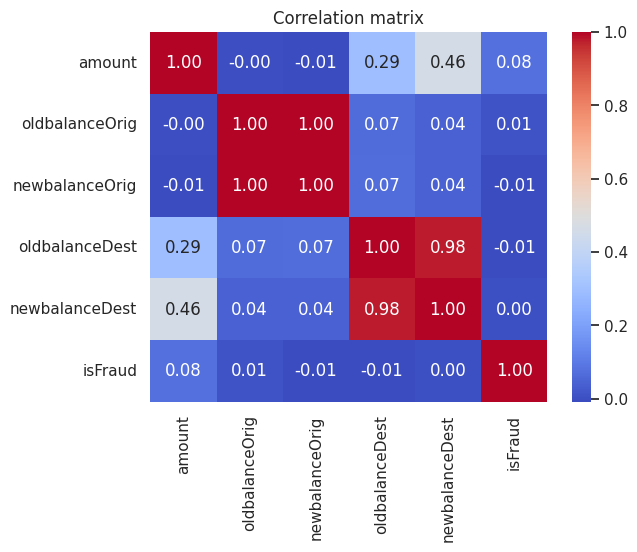

In [48]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt= ".2f")
plt.title("Correlation matrix")
plt.show()

In [49]:
zero_after_transfer = df[
    (df["oldbalanceOrig"] > 0) &
    (df["newbalanceDest"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
    ]

In [50]:
len(zero_after_transfer)

13259

In [51]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
19,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.0,0.0,0,0,705.00,22425.0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.0,0.0,0,0,20411.53,25742.0
70,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.0,0.0,0,0,47458.86,52120.0


#Feature engineering - glavni cilj popraviti problem nebalansiranih klasa

In [52]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Potrebno izbaciti stupce koje NECEMO koristiti prilikom treniranja modela

In [54]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [55]:
df_model.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


Potrebno enkodirati kategoričke značajke i skalirati numericke

In [56]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrig", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [58]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Definiramo preprocesora kojeg cemo kasnije prosljediti PIPELINEU

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical),
    ],
    remainder="drop"
)

In [62]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter = 1000))
]) ##pomoću parametara class_weight rješavamo problem nebalansiranih klasa

In [63]:
##fitanje modela
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrig',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [65]:
y_pred = pipeline.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [68]:
print(confusion_matrix(y_test, y_pred))

[[1804823  101499]
 [    151    2313]]


In [69]:
pipeline.score(X_test, y_test)

0.9467462565211606

In [70]:
import joblib

joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']